In [1]:
#Load necessary libraries
import pylab
%pylab inline
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


Populating the interactive namespace from numpy and matplotlib


C:\Users\Umar Ibn Ali\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
#load dataset in pandas
df= pd.read_csv("/Users/Umar Ibn Ali/Desktop/FYP/Model/Iran_dataset_re.csv")

In [3]:
#check dataset
df.head()

,Year,GPI,GDP,No of country,Density,Pos Sent,Neg Sent,Neu Sent,Population
0,2003,NaN,2269,3,42.08,NaN,NaN,NaN,984896
1,2004,NaN,2671,3,42.57,NaN,NaN,NaN,1045976
2,2005,NaN,3202,5,43.06,NaN,NaN,NaN,974302
3,2006,NaN,3733,5,43.06,NaN,NaN,NaN,968370
4,2007,NaN,4758,5,43.06,NaN,NaN,NaN,963546


In [4]:
df.describe()

,Year,GPI,GDP,No of country,Density,Pos Sent,Neg Sent,Neu Sent,Population
count,14.0000,9.000000,14.000000,14.000000,14.000000,3.000000,3.000000,3.000000,1.400000e+01
mean,2009.5000,2.343778,4772.857143,5.714286,45.377857,58.333333,8.333333,33.333333,9.701440e+05
std,4.1833,0.097423,1425.279722,1.589803,2.408786,38.188131,14.433757,28.867513,6.652919e+04
min,2003.0000,2.202000,2269.000000,3.000000,42.080000,25.000000,0.000000,0.000000,8.573540e+05
25%,2006.2500,2.241000,3980.500000,5.000000,43.060000,37.500000,0.000000,25.000000,9.534068e+05
50%,2009.5000,2.356000,5072.500000,5.500000,45.320000,50.000000,0.000000,50.000000,9.768685e+05
75%,2012.7500,2.411000,5413.250000,7.000000,47.217500,75.000000,12.500000,50.000000,9.836992e+05
max,2016.0000,2.473000,7681.000000,8.000000,49.300000,100.000000,25.000000,50.000000,1.073366e+06


In [5]:
#fill column with missing values
df['GPI'].fillna(mean(df.GPI),inplace=True)
df['Pos Sent'].fillna(mean(df['Pos Sent']),inplace=True)
df['Neg Sent'].fillna(mean(df['Neg Sent']),inplace=True)
df['Neu Sent'].fillna(mean(df['Neu Sent']),inplace=True)



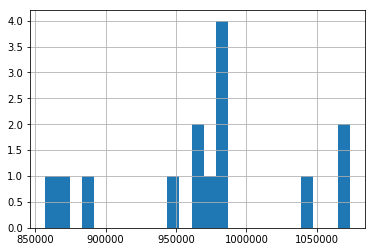

In [6]:
#check population histogram
df['Population'].hist(bins=25)

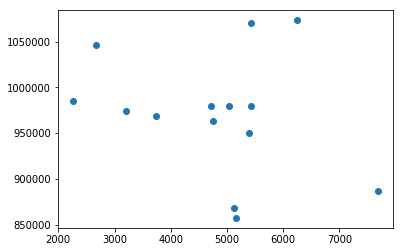

In [7]:
#check relationship between GDP and Population
import matplotlib.pyplot as plt
plt.scatter(df['GDP'], df['Population'])
plt.show() 

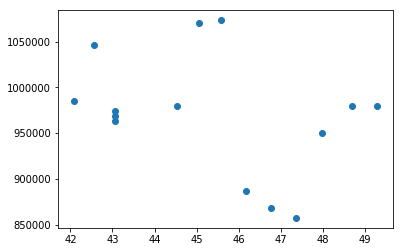

In [8]:
#check relationship between Density and Population
plt.scatter(df['Density'], df['Population'])
plt.show() 

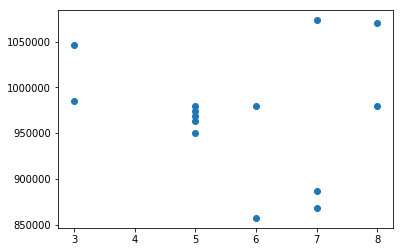

In [9]:
#check relationship between No of country and Population
plt.scatter(df['No of country'], df['Population'])
plt.show() 

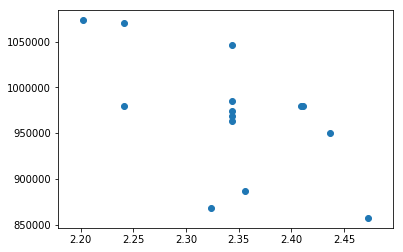

In [10]:
#check relationship between No of country and Population
plt.scatter(df['GPI'], df['Population'])
plt.show() 

In [11]:
#check GDP and Population linear relationship
feature_cols = ['GDP']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  1026236.74687
Coefficient:  [-11.75244622]
R squared value:  0.0633916784983


In [12]:
#check Density and Population linear relationship
feature_cols = ['Density']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  1384048.73088
Coefficient:  [-9121.29300376]
R squared value:  0.109064813887


In [13]:
#check No of Country and Population linear relationship
feature_cols = ['No of country']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  990744.0
Coefficient:  [-3605.]
R squared value:  0.00742117163277


In [14]:
#check GPI and Population linear relationship
feature_cols = ['GPI']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  2210994.24034
Coefficient:  [-529423.16123424]
R squared value:  0.369869800754


In [15]:
# include all variables to build a model
X = df[['GDP', 'Density', 'No of country','GPI']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state=42)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE-Root Mean Squared Error
print("RMSE Score: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE is the mean of the absolute value of the errors:
print("MAE Score: ",metrics.mean_absolute_error(y_test, y_pred))

#MSE is the mean of the squared errors:
print("MSE Score: ",metrics.mean_squared_error(y_test, y_pred))

#check R squared value
print("R squared value: ",lm2.score(X,y))

RMSE Score:  70967.4618544
MAE Score:  57509.2948814
MSE Score:  5036380642.06
R squared value:  0.528732456915


In [16]:
# include all variables to build a model
X = df[['GDP', 'Density', 'No of country']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state=42)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE-Root Mean Squared Error
print("RMSE Score: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE is the mean of the absolute value of the errors:
print("MAE Score: ",metrics.mean_absolute_error(y_test, y_pred))

#MSE is the mean of the squared errors:
print("MSE Score: ",metrics.mean_squared_error(y_test, y_pred))

#check R squared value
print("R squared value: ",lm2.score(X,y))

RMSE Score:  64437.9900979
MAE Score:  45505.1701972
MSE Score:  4152254567.86
R squared value:  0.0246171618879


In [17]:
# include all variables to build a model
X = df[['GDP', 'Density']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state=42)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE-Root Mean Squared Error
print("RMSE Score: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE is the mean of the absolute value of the errors:
print("MAE Score: ",metrics.mean_absolute_error(y_test, y_pred))

#MSE is the mean of the squared errors:
print("MSE Score: ",metrics.mean_squared_error(y_test, y_pred))

#check R squared value
print("R squared value: ",lm2.score(X,y))

RMSE Score:  47363.0061175
MAE Score:  32340.5998202
MSE Score:  2243254348.48
R squared value:  0.0992394423417


In [18]:
#predict the GDP for future using a linear model with Year
from sklearn import linear_model
X = df[['Year']]
y = df[['GDP']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state=42)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

#R squared value
print("R squared value: ",lm2.score(X,y))

# Predict
pred_Den = [0,0,0,0,0,0]
for i in range (0,6):
    pred_Den[i] = lm2.predict(2017+i)

for i in range(0,6):
    print("Predicted GDP for year: ",(2017+i),pred_Den[i])
lm2.predict(2016)      

R squared value:  0.359485325165
Predicted GDP for year:  2017 [[ 6844.28315412]]
Predicted GDP for year:  2018 [[ 7090.38799283]]
Predicted GDP for year:  2019 [[ 7336.49283154]]
Predicted GDP for year:  2020 [[ 7582.59767025]]
Predicted GDP for year:  2021 [[ 7828.70250896]]
Predicted GDP for year:  2022 [[ 8074.80734767]]


array([[ 6598.17831541]])

In [19]:
#predict the Density for future using a linear model with Year
from sklearn import linear_model
X = df[['Year']]
y = df[['Density']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state=42)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

#R squared value
print("R squared value: ",lm2.score(X,y))

# Predict
pred_Den = [0,0,0,0,0,0]
for i in range (0,6):
    pred_Den[i] = lm2.predict(2017+i)

for i in range(0,6):
    print("Predicted Density for year: ",(2017+i),pred_Den[i])
lm2.predict(2016)      

R squared value:  0.981280557373
Predicted Density for year:  2017 [[ 49.67845878]]
Predicted Density for year:  2018 [[ 50.26007168]]
Predicted Density for year:  2019 [[ 50.84168459]]
Predicted Density for year:  2020 [[ 51.42329749]]
Predicted Density for year:  2021 [[ 52.00491039]]
Predicted Density for year:  2022 [[ 52.5865233]]


array([[ 49.09684588]])

In [20]:
# Forecasted Population of Indonesia
X = df[['GDP','Density']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state=42)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)


    
var_2017 = [[6844.28315412,49.67845878]]
var_2018 = [[7090.38799283,50.26007168]]
var_2019 = [[7336.49283154,50.84168459]]                               
var_2020 = [[7582.59767025,51.42329749]]
var_2021 = [[7828.70250896,52.00491039]]
var_2022 = [[8074.80734767,52.5865233]]

print("Predicted Population for year 2017: ",lm2.predict(var_2017))
print("Predicted Population for year 2018: ",lm2.predict(var_2018))
print("Predicted Population for year 2019: ",lm2.predict(var_2019))
print("Predicted Population for year 2020: ",lm2.predict(var_2020))
print("Predicted Population for year 2021: ",lm2.predict(var_2021))
print("Predicted Population for year 2022: ",lm2.predict(var_2022))



Predicted Population for year 2017:  [ 931503.75288624]
Predicted Population for year 2018:  [ 925451.37479918]
Predicted Population for year 2019:  [ 919398.99663232]
Predicted Population for year 2020:  [ 913346.61854526]
Predicted Population for year 2021:  [ 907294.2404582]
Predicted Population for year 2022:  [ 901241.86229133]


In [21]:
var_2016=[[6598.17831541,49.09684588]]
lm2.predict(var_2016)

array([ 937556.1309733])